### Tugas Praktikum

In [1]:
import numpy as np # menyediakan dukungan untuk array multidimensi dan berbagai fungsi matematika
import pandas as pd # menyediakan struktur data dan fungsi operasi data
import tensorflow as tf # merupakan salah satu pustaka yang sangat populer untuk deep learning dan machine learning
import matplotlib.pyplot as plt # Membantu dalam memvisualisasikan data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


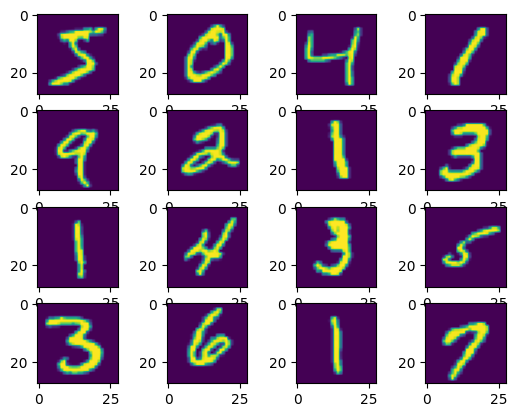

In [4]:
# plotting the first 16 images in the train set of MNIST

fig, axs = plt.subplots(4, 4)
cnt = 0
for i in range(4):
     for j in range(4):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [5]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

#### Membuat Model ANN

In [6]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Flatten(input_shape=(28,28))) # Layer Flatten mengubah format data dari bentuk matriks 2D (atau lebih tinggi) menjadi vektor 1D, yang selanjutnya digunakan Dense Layer
# input_shape=(28,28) menetukan ukuran input

ann.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu)) # Menambahkan Dense Layer dengan fungsi aktivasi Rectified Linear Unit (ReLU), dengan 128 neuron

ann.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))

ann.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)) # Menambahkan Dense Layer dengan 10 neuron untuk output dan fungsi aktivasi berupa Softmax
# Fungsi aktivasi Softmax mengubah setiap nilai input menjadi nilai antara 0 dan 1, yang bisa diinterpretasikan sebagai probabilitas, dan memastikan bahwa total semua probabilitas adalah 1.

#### Training Model

In [7]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Optimizer ADAM (Adaptive Moment Estimation) untuk memperbarui bobot
# sparse_categorical_crossentropy, sebagai loss function untuk klasifikasi multikelas
# ‘accuracy’ sebagai metrik yang menghitung persentase prediksi

In [8]:
ann.fit(X_train, y_train, epochs=100, batch_size=100) # Melatih ANN model dengan maksimal 100 Epoch atau iterasi dan 100 sampel latihan

Epoch 1/100
600/600 [==============================] - 6s 9ms/step - loss: 0.3539 - accuracy: 0.8999
Epoch 2/100
600/600 [==============================] - 6s 9ms/step - loss: 0.1435 - accuracy: 0.9566
Epoch 3/100
600/600 [==============================] - 5s 9ms/step - loss: 0.0964 - accuracy: 0.9707
Epoch 4/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0709 - accuracy: 0.9780
Epoch 5/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0550 - accuracy: 0.9828
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 7/100
600/600 [==============================] - 5s 8ms/step - loss: 0.0352 - accuracy: 0.9890
Epoch 8/100
600/600 [==============================] - 4s 6ms/step - loss: 0.0269 - accuracy: 0.9918
Epoch 9/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0222 - accuracy: 0.9930
Epoch 10/100
600/600 [==============================] - 4s 7ms/step - loss: 0.0180 - accura

In [9]:
# Evaluasi Model
loss, accuracy = ann.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2102 - accuracy: 0.9779
0.21017949283123016
0.9779000282287598


#### Membuat Prediksi

In [10]:
y_pred = np.argmax(ann.predict(X_test), axis=-1) # melakukan prediksi nilai berdasarkan X_test

313/313 [==============================] - 1s 3ms/step


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score # Berguna dalam menghitung akurasi skor dan confusion matrix

cm = confusion_matrix(y_test, y_pred) # menghitung confusion matrix berdasarkan hasil tes dan prediksi
print(cm) # menampilkan hasil confusion matrix
accuracy_score(y_test, y_pred) # menghitung dan menampilkan akurasi matrix berdasarkan hasil tes dan prediksi

[[ 970    1    1    0    1    0    3    1    2    1]
 [   0 1123    2    1    0    0    3    1    5    0]
 [   4    1 1010    2    2    0    2    3    8    0]
 [   0    1    3  990    0    2    0    4    5    5]
 [   0    0    4    0  962    0    4    3    2    7]
 [   2    0    1   13    0  862    5    2    6    1]
 [   4    2    1    1    6    5  938    0    1    0]
 [   1    4   12    3    2    0    0 1000    2    4]
 [   2    1    3    5    3    3    1    4  947    5]
 [   4    3    0    4   12    3    0    2    4  977]]


0.9779

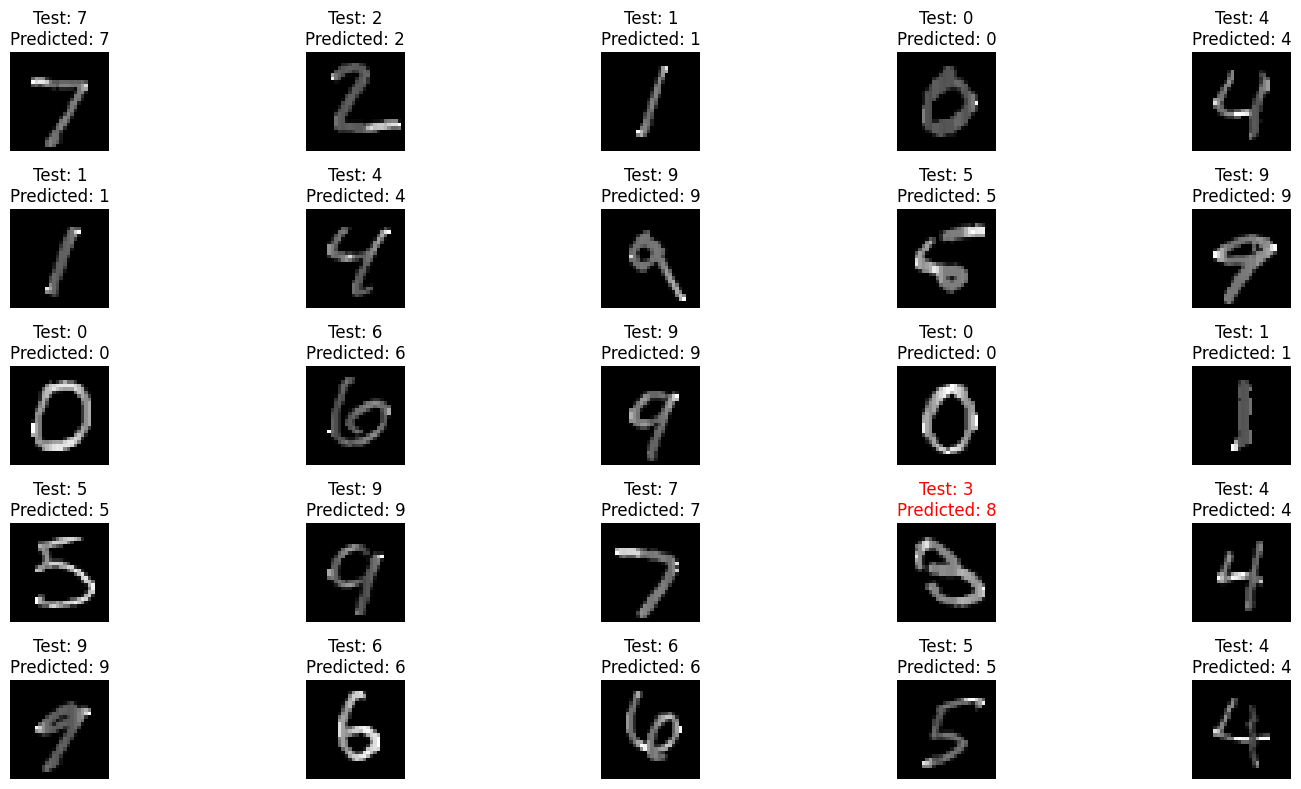

In [12]:
# Tentukan jumlah citra yang ingin ditampilkan
n_images = 25

# Ambil n_images citra dari data pengujian
sample_images = X_test[:n_images]
sample_labels = y_test[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred[i]}",
              color='black'
              if sample_labels[i] == y_pred[i]
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()